In [2]:
# 1. Import libraries
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import hstack

In [3]:
# 2. Load dataset
data = pd.read_csv("D:\\Customer-Satisfaction-dashboard\\data\\customer_support_tickets.csv")
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   object 
 13  Tic

In [4]:
# 3. Drop IDs / PII
data = data.drop(columns=["Ticket ID", "Customer Name", "Customer Email"], errors='ignore')

# 4. Handle Dates → Numeric
data["Date of Purchase"] = pd.to_datetime(data["Date of Purchase"], errors="coerce", format="%Y-%m-%d")
data["days_since_purchase"] = (pd.to_datetime("today") - data["Date of Purchase"]).dt.days

# 5. Encode categorical
label_encoders = {}
for col in ["Customer Gender", "Product Purchased", "Ticket Type",
            "Ticket Status", "Ticket Priority", "Ticket Channel"]:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col].astype(str).fillna("Unknown"))
    label_encoders[col] = le


In [5]:
# 6. NLP Features
tfidf = TfidfVectorizer(max_features=500000, stop_words="english")
ticket_text = data["Ticket Subject"].fillna("") + " " + data["Ticket Description"].fillna("")
text_features = tfidf.fit_transform(ticket_text)

# 7. Define Features & Target
X = data.drop(columns=["Customer Satisfaction Rating", "Ticket Subject", "Ticket Description", 
                       "Date of Purchase", "Resolution", "First Response Time", "Time to Resolution"])
X = hstack([X.values, text_features])
y = data["Customer Satisfaction Rating"]


In [7]:
# 8. Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Remove rows with NaN in y_train and y_test
from scipy.sparse import issparse
from sklearn.impute import SimpleImputer

# For training set
train_not_nan = ~y_train.isna()
if issparse(X_train):
	X_train_clean = X_train[train_not_nan.values]
else:
	X_train_clean = X_train[train_not_nan.values]
y_train_clean = y_train[train_not_nan]

# For test set
test_not_nan = ~y_test.isna()
if issparse(X_test):
	X_test_clean = X_test[test_not_nan.values]
else:
	X_test_clean = X_test[test_not_nan.values]
y_test_clean = y_test[test_not_nan]

# Impute missing values in features (if any)
imputer = SimpleImputer(strategy="constant", fill_value=0)
X_train_clean = imputer.fit_transform(X_train_clean)
X_test_clean = imputer.transform(X_test_clean)

# 9. Model Training
rfc = RandomForestClassifier(random_state=42, n_estimators=200)
rfc.fit(X_train_clean, y_train_clean)

c:\Users\Tanisha\miniconda3\Lib\site-packages\sklearn\impute\_base.py:473: FutureWarning: Currently, when `keep_empty_feature=False` and `strategy="constant"`, empty features are not dropped. This behaviour will change in version 1.8. Set `keep_empty_feature=True` to preserve this behaviour.
  warnings.warn(


,n_estimators,200
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Accuracy: 0.1986062717770035
              precision    recall  f1-score   support

         1.0       0.23      0.24      0.24       115
         2.0       0.13      0.14      0.13       109
         3.0       0.21      0.21      0.21       117
         4.0       0.22      0.16      0.19       126
         5.0       0.21      0.24      0.22       107

    accuracy                           0.20       574
   macro avg       0.20      0.20      0.20       574
weighted avg       0.20      0.20      0.20       574



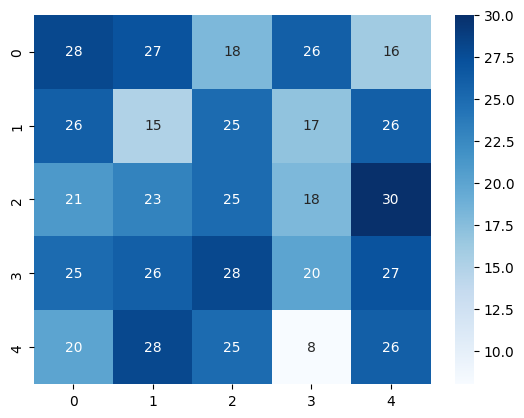

In [8]:
# 10. Evaluation
y_pred = rfc.predict(X_test_clean)
print("Accuracy:", accuracy_score(y_test_clean, y_pred))
print(classification_report(y_test_clean, y_pred))
sns.heatmap(confusion_matrix(y_test_clean, y_pred), annot=True, fmt='d', cmap='Blues')
plt.show()

In [9]:
#Step 2: Exploratory Data Analysis (EDA)

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
df = pd.read_csv("D:\\Customer-Satisfaction-dashboard\\data\\customer_support_tickets.csv")

# Quick overview
print(df.shape)
print(df.info())
print(df.head())
print(df.describe(include='all'))

(8469, 17)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8469 entries, 0 to 8468
Data columns (total 17 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Ticket ID                     8469 non-null   int64  
 1   Customer Name                 8469 non-null   object 
 2   Customer Email                8469 non-null   object 
 3   Customer Age                  8469 non-null   int64  
 4   Customer Gender               8469 non-null   object 
 5   Product Purchased             8469 non-null   object 
 6   Date of Purchase              8469 non-null   object 
 7   Ticket Type                   8469 non-null   object 
 8   Ticket Subject                8469 non-null   object 
 9   Ticket Description            8469 non-null   object 
 10  Ticket Status                 8469 non-null   object 
 11  Resolution                    2769 non-null   object 
 12  Ticket Priority               8469 non-null   objec

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_11176\2333492827.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Customer Satisfaction Rating", data=df, palette="viridis")


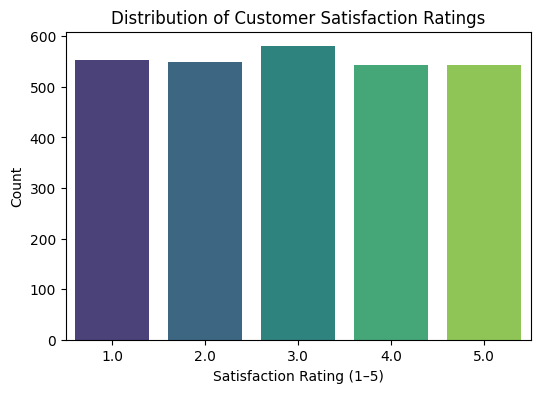

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_11176\2333492827.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Product Purchased", data=df, order=df['Product Purchased'].value_counts().index, palette="viridis")


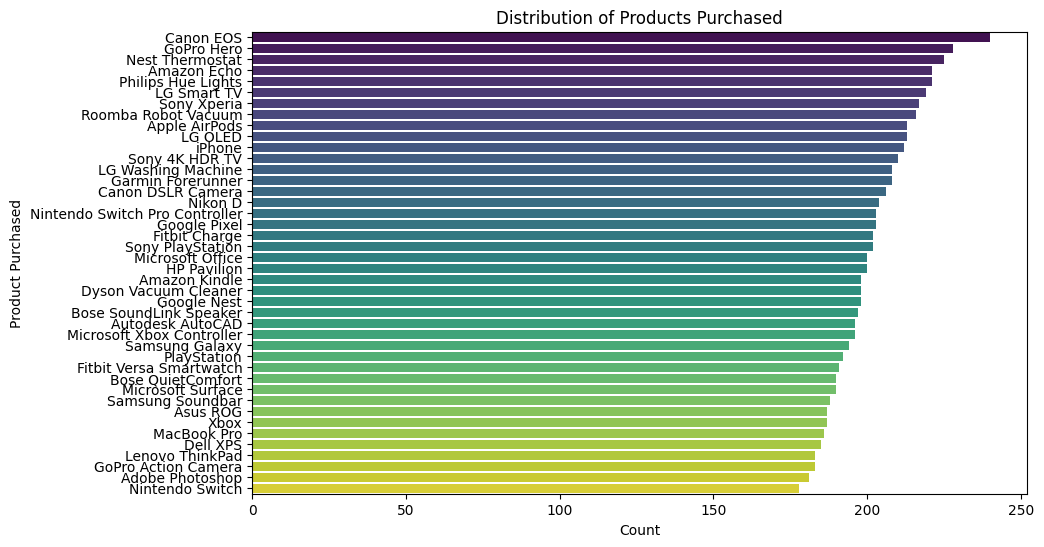

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_11176\2333492827.py:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Ticket Type", data=df, order=df['Ticket Type'].value_counts().index, palette="viridis")


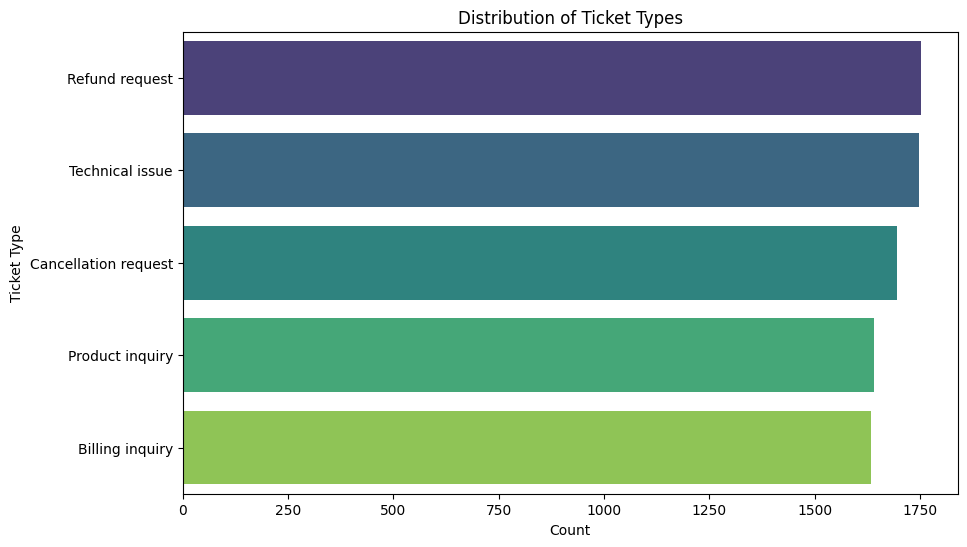

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_11176\2333492827.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Ticket Status", data=df, order=df['Ticket Status'].value_counts().index, palette="viridis")


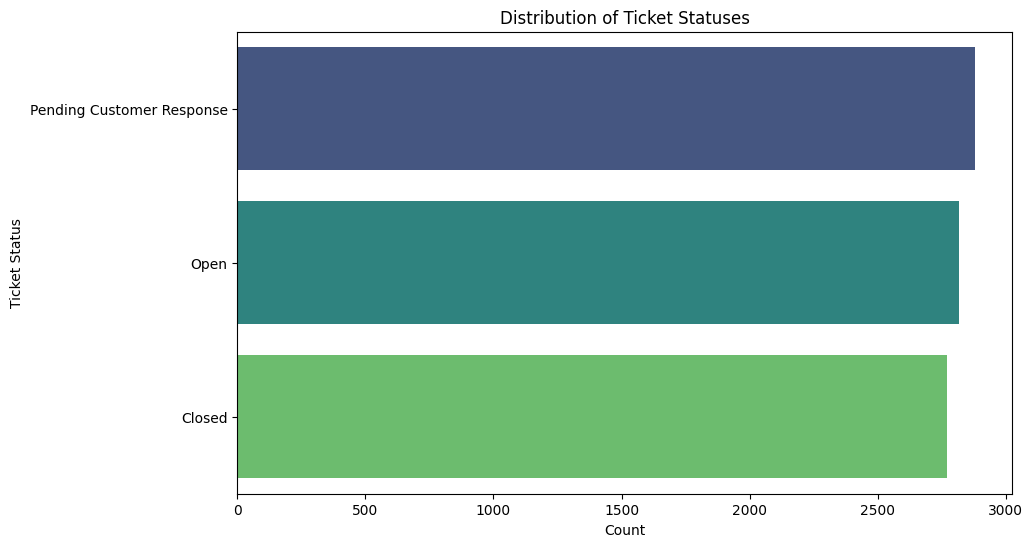

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_11176\2333492827.py:26: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Ticket Priority", data=df, order=df['Ticket Priority'].value_counts().index, palette="viridis")


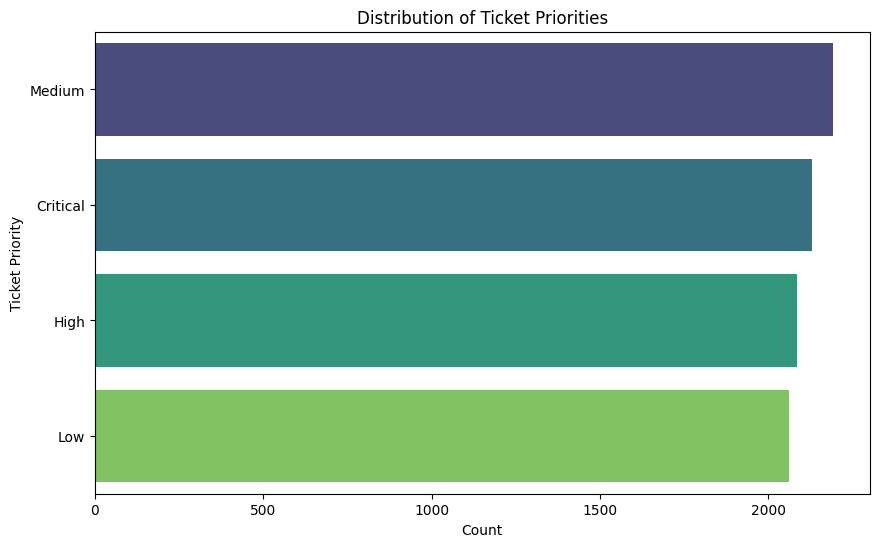

C:\Users\Tanisha\AppData\Local\Temp\ipykernel_11176\2333492827.py:32: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y="Ticket Channel", data=df, order=df['Ticket Channel'].value_counts().index, palette="viridis")


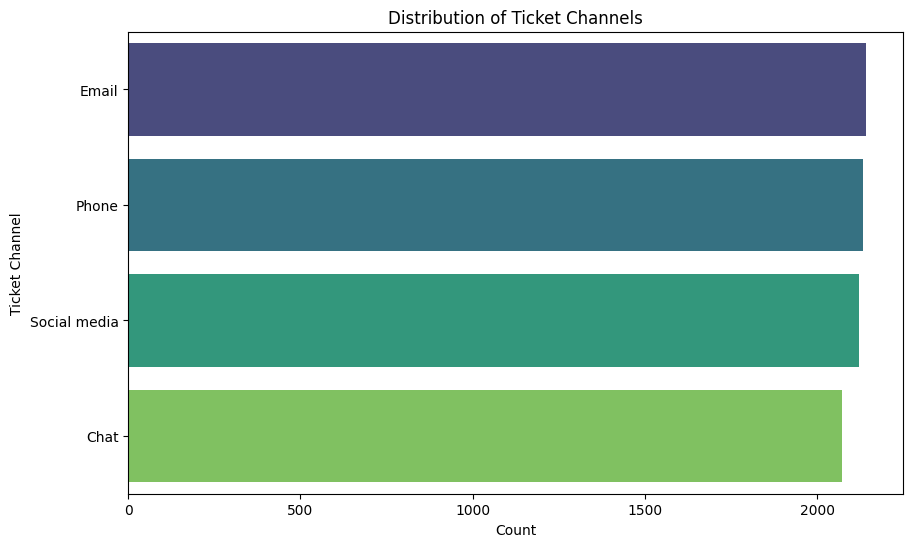

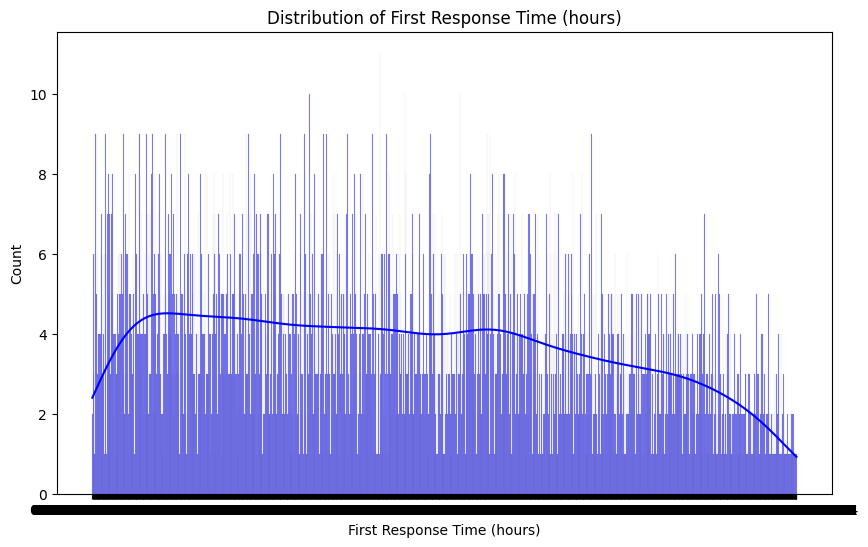

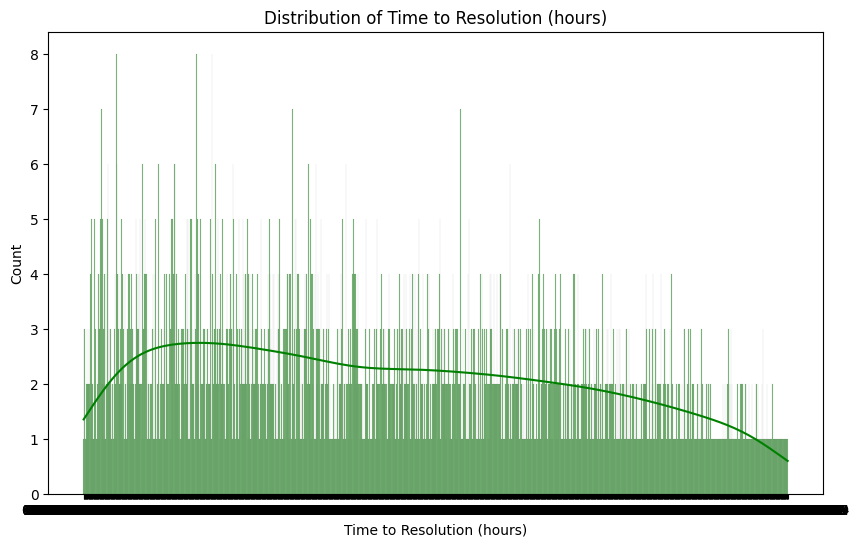

<Figure size 1200x1000 with 0 Axes>

In [12]:
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Satisfaction Rating", data=df, palette="viridis")
plt.title("Distribution of Customer Satisfaction Ratings")
plt.xlabel("Satisfaction Rating (1–5)")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(y="Product Purchased", data=df, order=df['Product Purchased'].value_counts().index, palette="viridis")
plt.title("Distribution of Products Purchased")
plt.xlabel("Count")
plt.ylabel("Product Purchased")
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(y="Ticket Type", data=df, order=df['Ticket Type'].value_counts().index, palette="viridis")
plt.title("Distribution of Ticket Types")
plt.xlabel("Count")
plt.ylabel("Ticket Type")
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(y="Ticket Status", data=df, order=df['Ticket Status'].value_counts().index, palette="viridis")
plt.title("Distribution of Ticket Statuses")
plt.xlabel("Count")
plt.ylabel("Ticket Status")
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(y="Ticket Priority", data=df, order=df['Ticket Priority'].value_counts().index, palette="viridis")
plt.title("Distribution of Ticket Priorities")
plt.xlabel("Count")
plt.ylabel("Ticket Priority")
plt.show()
plt.figure(figsize=(10,6))
sns.countplot(y="Ticket Channel", data=df, order=df['Ticket Channel'].value_counts().index, palette="viridis")
plt.title("Distribution of Ticket Channels")
plt.xlabel("Count")
plt.ylabel("Ticket Channel")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df["First Response Time"].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of First Response Time (hours)")
plt.xlabel("First Response Time (hours)")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(10,6))
sns.histplot(df["Time to Resolution"].dropna(), bins=30, kde=True, color="green")
plt.title("Distribution of Time to Resolution (hours)")
plt.xlabel("Time to Resolution (hours)")
plt.ylabel("Count")
plt.show()
plt.figure(figsize=(12,10))
df_corr = df.select_dtypes(include=['number']).copy()
sns.set(font_scale=1.2)


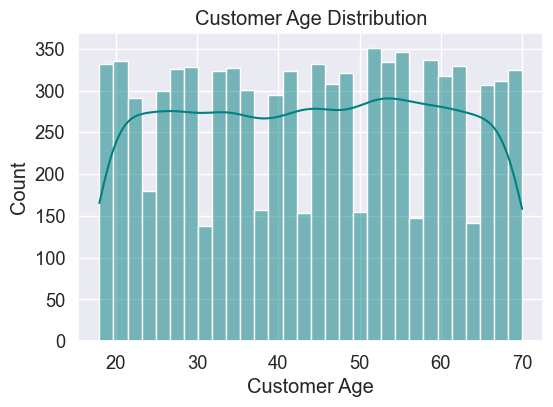

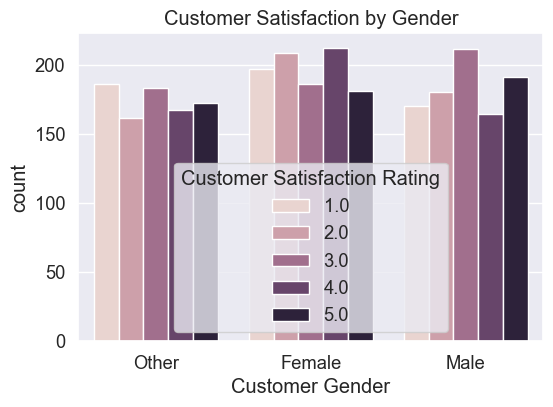

In [13]:
# Age distribution
plt.figure(figsize=(6,4))
sns.histplot(df["Customer Age"], bins=30, kde=True, color="teal")
plt.title("Customer Age Distribution")
plt.show()

# Gender distribution vs rating
plt.figure(figsize=(6,4))
sns.countplot(x="Customer Gender", hue="Customer Satisfaction Rating", data=df)
plt.title("Customer Satisfaction by Gender")
plt.show()


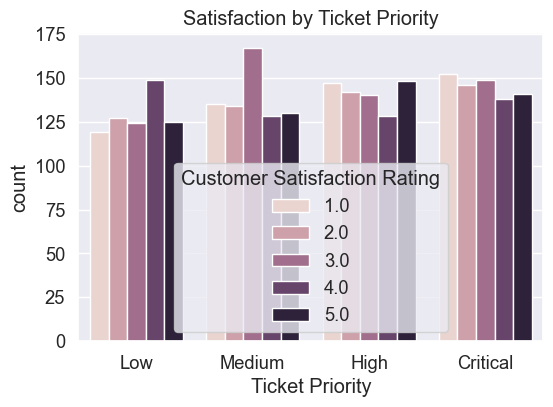

In [14]:
plt.figure(figsize=(6,4))
sns.countplot(x="Ticket Priority", hue="Customer Satisfaction Rating", data=df,
              order=["Low","Medium","High","Critical"])
plt.title("Satisfaction by Ticket Priority")
plt.show()


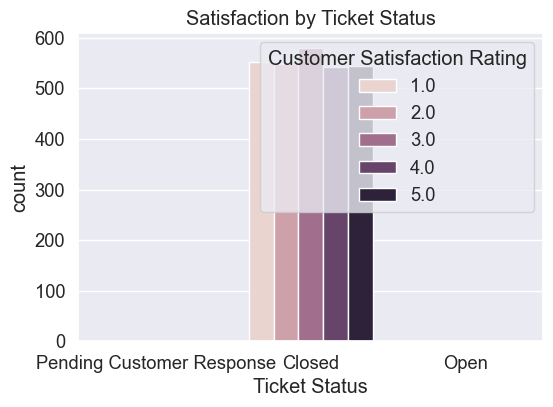

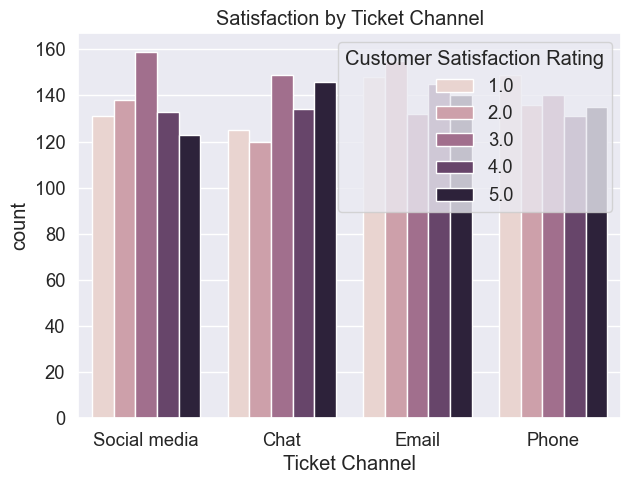

In [15]:
# Status vs rating
plt.figure(figsize=(6,4))
sns.countplot(x="Ticket Status", hue="Customer Satisfaction Rating", data=df)
plt.title("Satisfaction by Ticket Status")
plt.show()

# Channel vs rating
plt.figure(figsize=(7,5))
sns.countplot(x="Ticket Channel", hue="Customer Satisfaction Rating", data=df)
plt.title("Satisfaction by Ticket Channel")
plt.show()


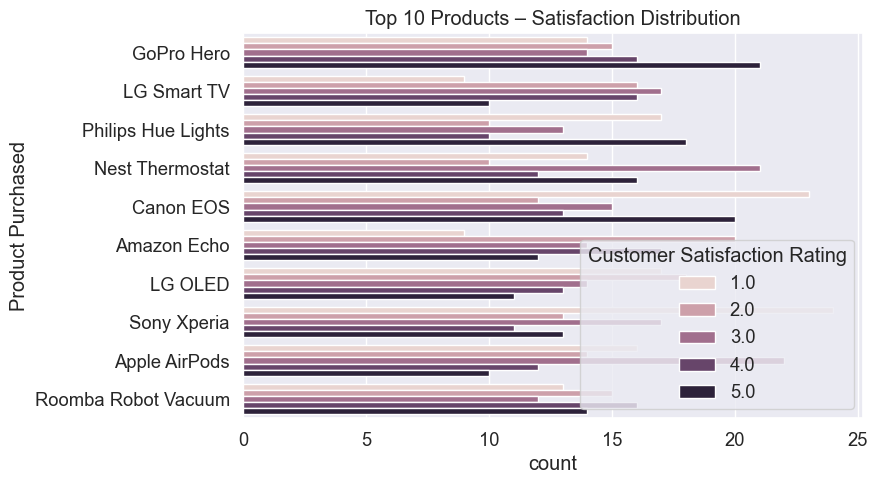

In [16]:
top_products = df["Product Purchased"].value_counts().head(10).index
plt.figure(figsize=(8,5))
sns.countplot(y="Product Purchased", hue="Customer Satisfaction Rating",
              data=df[df["Product Purchased"].isin(top_products)], dodge=True)
plt.title("Top 10 Products – Satisfaction Distribution")
plt.show()


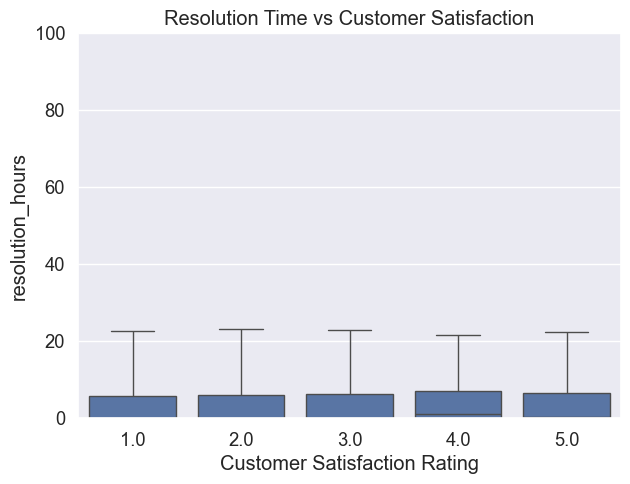

In [17]:
# Convert to datetime
df["First Response Time"] = pd.to_datetime(df["First Response Time"], errors="coerce")
df["Time to Resolution"] = pd.to_datetime(df["Time to Resolution"], errors="coerce")

# Resolution time in hours
df["resolution_hours"] = (df["Time to Resolution"] - df["First Response Time"]).dt.total_seconds() / 3600

plt.figure(figsize=(7,5))
sns.boxplot(x="Customer Satisfaction Rating", y="resolution_hours", data=df)
plt.title("Resolution Time vs Customer Satisfaction")
plt.ylim(0,100)  # cap outliers
plt.show()


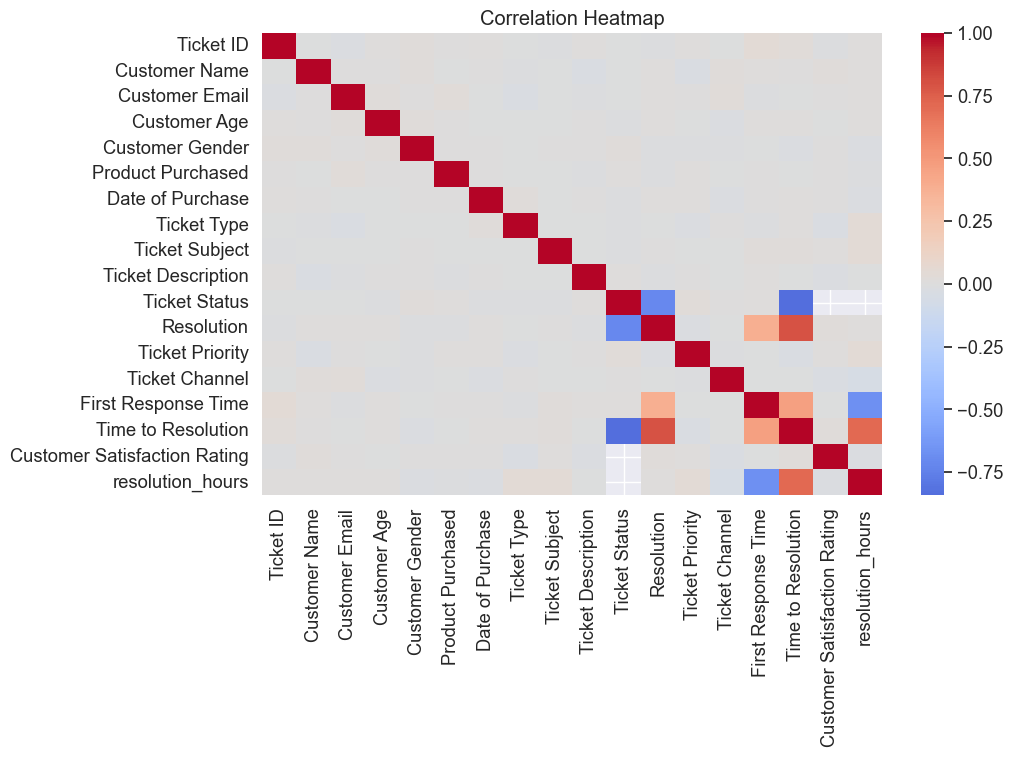

In [18]:
# Encode categorical for correlation
df_corr = df.copy()
for col in df_corr.select_dtypes(include="object").columns:
    df_corr[col] = df_corr[col].astype("category").cat.codes

plt.figure(figsize=(10,6))
sns.heatmap(df_corr.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [19]:
#Step 3: Feature Engineering
df_ml = df.drop(columns=[
    "Ticket ID", "Customer Name", "Customer Email",
    "Ticket Subject", "Ticket Description", "Resolution"
])


In [20]:
from sklearn.preprocessing import LabelEncoder

cat_cols = df_ml.select_dtypes(include=["object"]).columns
le = LabelEncoder()

for col in cat_cols:
    df_ml[col] = le.fit_transform(df_ml[col].astype(str))


In [21]:
df_ml = df_ml.fillna(0)


In [22]:
from sklearn.preprocessing import StandardScaler

num_cols = ["Customer Age", "resolution_hours"]
scaler = StandardScaler()
df_ml[num_cols] = scaler.fit_transform(df_ml[num_cols])


In [23]:
#Step 4: Model Building
X = df_ml.drop("Customer Satisfaction Rating", axis=1)
y = df_ml["Customer Satisfaction Rating"]


In [33]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)


In [34]:
#Model 2: Gradient Boosting (XGBoost)
from xgboost import XGBClassifier

# Drop object columns not supported by XGBoost
X_train_xgb = X_train.drop(columns=["First Response Time", "Time to Resolution"], errors="ignore")
xgb = XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
xgb.fit(X_train_xgb, y_train)


c:\Users\Tanisha\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:18:22] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


,objective,'multi:softprob'
,base_score,None
,booster,None
,callbacks,None
,colsample_bylevel,None
,colsample_bynode,None
,colsample_bytree,None
,device,None
,early_stopping_rounds,None
,enable_categorical,False
,eval_metric,'mlogloss'


In [36]:
#Step 5: Model Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

models = {"XGBoost": xgb}

for name, model in models.items():
    # Drop object columns for XGBoost
    if name == "XGBoost":
        X_test_xgb = X_test.drop(columns=["First Response Time", "Time to Resolution"], errors="ignore")
        y_pred = model.predict(X_test_xgb)
    else:
        y_pred = model.predict(X_test)
    print(f"\n=== {name} ===")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))



=== XGBoost ===
Accuracy: 0.7418339236521054
Classification Report:
               precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1710
         1.0       0.20      0.19      0.20       166
         2.0       0.24      0.27      0.25       165
         3.0       0.21      0.22      0.22       174
         4.0       0.16      0.15      0.15       163
         5.0       0.23      0.22      0.23       163

    accuracy                           0.74      2541
   macro avg       0.34      0.34      0.34      2541
weighted avg       0.74      0.74      0.74      2541

Confusion Matrix:
 [[1710    0    0    0    0    0]
 [   0   32   36   39   29   30]
 [   0   26   44   39   28   28]
 [   0   39   33   39   36   27]
 [   0   35   37   33   24   34]
 [   0   27   33   34   33   36]]


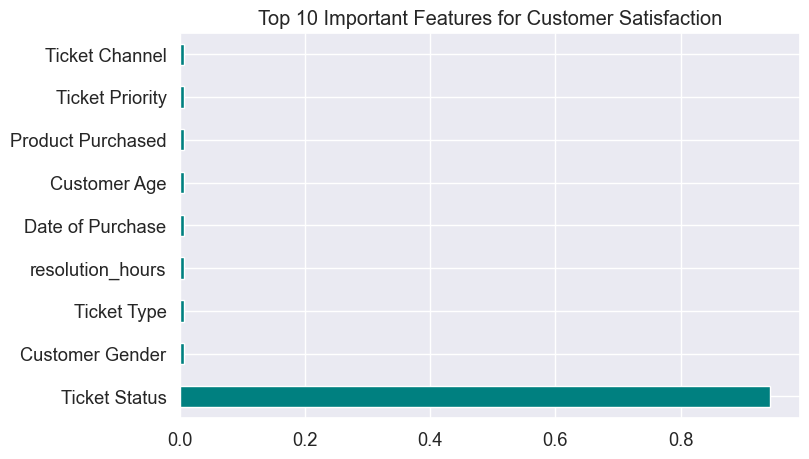

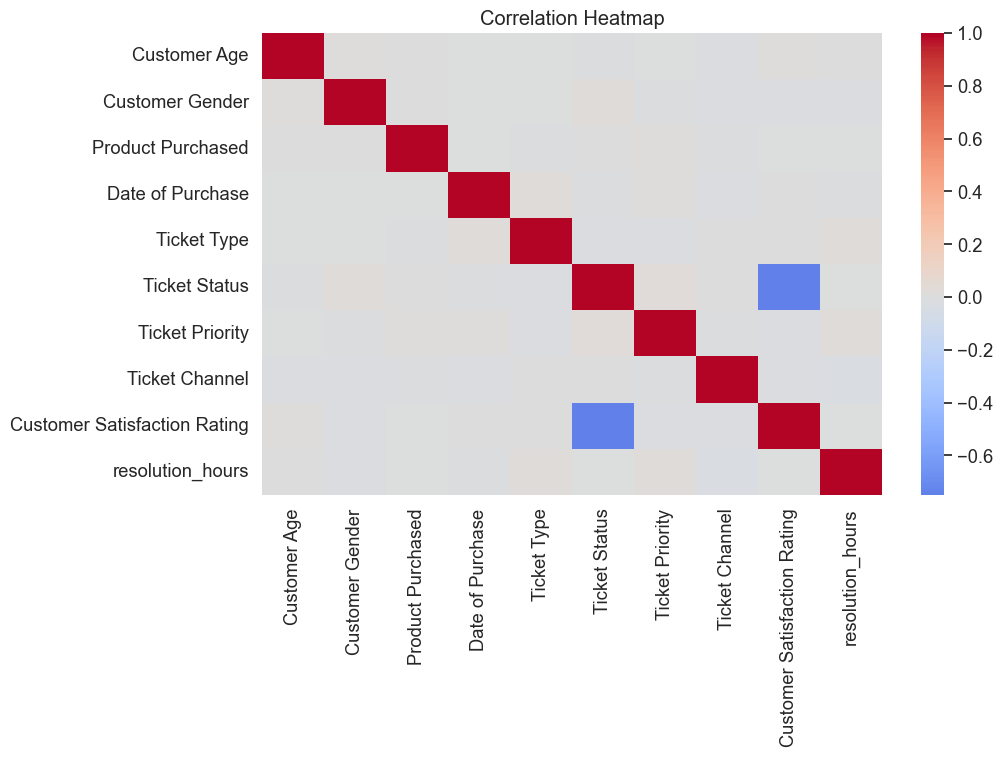

In [41]:
#Step 6: Visualization
import matplotlib.pyplot as plt
import pandas as pd

feat_imp = pd.Series(xgb.feature_importances_, index=X_train_xgb.columns).sort_values(ascending=False)
feat_imp.head(10).plot(kind="barh", figsize=(8,5), color="teal")
plt.title("Top 10 Important Features for Customer Satisfaction")
plt.show()
#Step 7: Correlation Heatmap
import matplotlib.pyplot as plt
import seaborn as sns
df_corr = df_ml.copy()
plt.figure(figsize=(10,6))
sns.set(font_scale=1.2)
# Only use numeric columns for correlation
numeric_cols = df_corr.select_dtypes(include=[np.number])
sns.heatmap(numeric_cols.corr(), annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Heatmap")
plt.show()


In [44]:
# Step 7: Model Selection & Training
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report

# Dictionary to store models
models = {
   
    "XGBoost": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', random_state=42)
}

# Train & evaluate each model
for name, model in models.items():
    # Use X_train_xgb and X_test_xgb for XGBoost to avoid object dtype columns
    if name == "XGBoost":
        model.fit(X_train_xgb, y_train)
        y_pred = model.predict(X_test_xgb)
    else:
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
    print(f"🔹 {name} Results:")
    print("Accuracy:", accuracy_score(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print("="*60)


c:\Users\Tanisha\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:26:37] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


🔹 XGBoost Results:
Accuracy: 0.7418339236521054
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1710
         1.0       0.20      0.19      0.20       166
         2.0       0.24      0.27      0.25       165
         3.0       0.21      0.22      0.22       174
         4.0       0.16      0.15      0.15       163
         5.0       0.23      0.22      0.23       163

    accuracy                           0.74      2541
   macro avg       0.34      0.34      0.34      2541
weighted avg       0.74      0.74      0.74      2541



In [46]:
# Step 8: Hyperparameter Tuning 
from sklearn.model_selection import GridSearchCV

# Define parameter grid for XGBoost
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 6, 10],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.8, 1.0],
    'colsample_bytree': [0.8, 1.0]
}

# Grid Search
xgb = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric="mlogloss")
grid_search = GridSearchCV(estimator=xgb,
                           param_grid=param_grid,
                           cv=3,  # 3-fold cross validation
                           n_jobs=-1,
                           scoring='accuracy',
                           verbose=2)

# Use X_train_xgb and y_train for XGBoost (no object columns)
grid_search.fit(X_train_xgb, y_train)

print("✅ Best Parameters:", grid_search.best_params_)
print("✅ Best Training Score:", grid_search.best_score_)

# Retrain model with best parameters
best_xgb = grid_search.best_estimator_
y_pred_best = best_xgb.predict(X_test_xgb)

print("🎯 Test Accuracy (Tuned XGB):", accuracy_score(y_test, y_pred_best))
print(classification_report(y_test, y_pred_best))


Fitting 3 folds for each of 108 candidates, totalling 324 fits


c:\Users\Tanisha\miniconda3\Lib\site-packages\xgboost\training.py:183: UserWarning: [23:33:01] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


✅ Best Parameters: {'colsample_bytree': 1.0, 'learning_rate': 0.2, 'max_depth': 10, 'n_estimators': 100, 'subsample': 1.0}
✅ Best Training Score: 0.7430836707152496
🎯 Test Accuracy (Tuned XGB): 0.7449822904368358
              precision    recall  f1-score   support

         0.0       1.00      1.00      1.00      1710
         1.0       0.23      0.24      0.24       166
         2.0       0.23      0.24      0.23       165
         3.0       0.21      0.20      0.20       174
         4.0       0.21      0.18      0.19       163
         5.0       0.22      0.25      0.23       163

    accuracy                           0.74      2541
   macro avg       0.35      0.35      0.35      2541
weighted avg       0.74      0.74      0.74      2541



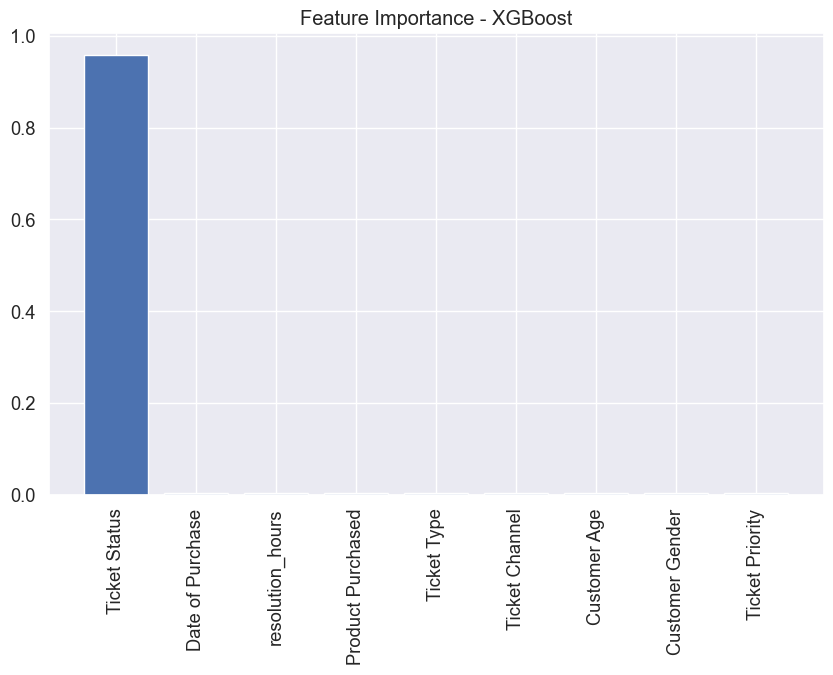

In [48]:
#Step 9: Interpretability & Feature Importance
import matplotlib.pyplot as plt
import numpy as np

# Get feature importance from tuned RF
importances = best_xgb.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(10,6))
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), [X_train_xgb.columns[i] for i in indices], rotation=90)
plt.title("Feature Importance - XGBoost")
plt.show()


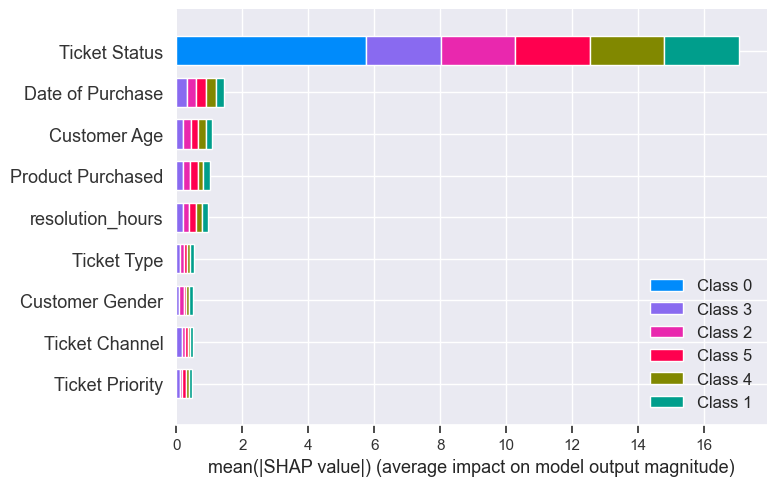

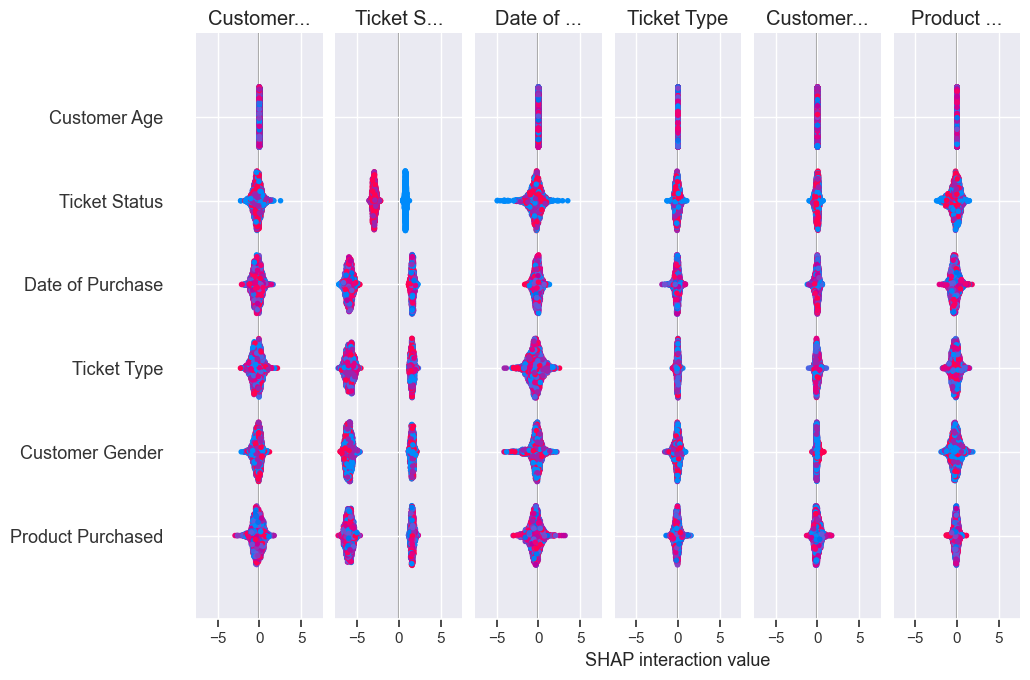

In [59]:
import shap

# Initialize SHAP
explainer = shap.TreeExplainer(best_xgb)
shap_values = explainer.shap_values(X_test_xgb)

# Global Feature Impact
shap.summary_plot(shap_values, X_test_xgb, plot_type="bar")

# Detailed feature effect distribution
shap.summary_plot(shap_values, X_test_xgb)


